# Bare Bones Regression
This notebook will be our bare bones baseline regression model. This will be a building block to moving to a Neural Network for ROI predictions

This is Regression #2 in our 5 part regression series



### Import All Requirements

In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

### 1. Read the CSV file into a pandas dataframe

In [13]:
df = pd.read_csv("../data/super_regression/movie_data.csv")

# Uncomment the following lines to checkout the first few rows of the DataFrame and learn more about its structure
print(df.head())
print(df.columns)

   tmdb_id  adult  belongs_to_collection  collection_id     budget  \
0       13  False                  False            NaN   55000000   
1   216015  False                   True       344830.0   40000000   
2      621  False                   True        86083.0    6000000   
3   800939  False                  False            NaN   20000000   
4    64682  False                  False            NaN  105000000   

                             genres  \
0    ['Comedy', 'Drama', 'Romance']   
1  ['Drama', 'Romance', 'Thriller']   
2             ['Romance', 'Comedy']   
3    ['Drama', 'Comedy', 'Romance']   
4              ['Drama', 'Romance']   

                                            overview  production_company_id  \
0  A man with a low IQ has accomplished great thi...                    4.0   
1  When college senior Anastasia Steele steps in ...                10146.0   
2  Australian good girl Sandy and greaser Danny f...                    4.0   
3  Divorced couple Georgia a

### 1.5 A little dataset exploration :)

In [40]:
# Find the movie with the minimum budget
min_budget_movie = df.loc[df['budget'].idxmin()]

# Find the movie with the maximum budget
max_budget_movie = df.loc[df['budget'].idxmax()]

# Find the movie with the minimum revenue
min_revenue_movie = df.loc[df['revenue'].idxmin()]

# Find the movie with the maximum revenue
max_revenue_movie = df.loc[df['revenue'].idxmax()]

# Display the results
print("Movie with Minimum Budget:")
print(min_budget_movie[['tmdb_id', 'budget']])

print("\nMovie with Maximum Budget:")
print(max_budget_movie[['tmdb_id', 'budget']])

print("\nMovie with Minimum Revenue:")
print(min_revenue_movie[['tmdb_id', 'revenue']])

print("\nMovie with Maximum Revenue:")
print(max_revenue_movie[['tmdb_id', 'revenue']])

# Filter the DataFrame to include only movies with a budget greater than one million dollars
filtered_df = df[df['budget'] > 1000000.0]

# Calculate ROI for each movie
filtered_df['ROI'] = filtered_df['revenue'] / filtered_df['budget']

# Find the movie with the highest ROI
max_roi_movie = filtered_df.loc[filtered_df['ROI'].idxmax()]

# Display the movie with the highest ROI
print("Movie with Greatest ROI (Budget > $300k):")
print(max_roi_movie[['tmdb_id', 'budget', 'revenue', 'ROI']])

# Calculate mean and median budget
mean_budget = df['budget'].mean()
median_budget = df['budget'].median()

# Calculate mean and median revenue
mean_revenue = df['revenue'].mean()
median_revenue = df['revenue'].median()

# Display the results
print("Mean Budget:", mean_budget)
print("Median Budget:", median_budget)
print("Mean Revenue:", mean_revenue)
print("Median Revenue:", median_revenue)

# Calculate the 25th percentile (first quartile) for budget and revenue
budget_25th_percentile = df['budget'].quantile(0.25)
revenue_25th_percentile = df['revenue'].quantile(0.25)

# Display the results
print("25th Percentile Budget:", budget_25th_percentile)
print("25th Percentile Revenue:", revenue_25th_percentile)

# Sort the filtered DataFrame by ROI in descending order
top_roi_movies = filtered_df.sort_values(by='ROI', ascending=False)

# Get the top 10 movies with highest ROI
top_10_roi_movies = top_roi_movies.head(10)

# Display the top 10 movies with highest ROI
print("Top 10 Movies with Highest ROI (Budget > $3M):")
print(top_10_roi_movies[['tmdb_id', 'budget', 'revenue', 'ROI']])




Movie with Minimum Budget:
tmdb_id    244537
budget          1
Name: 1176, dtype: object

Movie with Maximum Budget:
tmdb_id        76600
budget     460000000
Name: 2337, dtype: object

Movie with Minimum Revenue:
tmdb_id    416149
revenue         0
Name: 3902, dtype: object

Movie with Maximum Revenue:
tmdb_id         19995
revenue    2923706026
Name: 3495, dtype: object
Movie with Greatest ROI (Budget > $300k):
tmdb_id           408
budget        1488423
revenue     184925486
ROI        124.242561
Name: 4743, dtype: object
Mean Budget: 25909526.918757737
Median Budget: 11400000.0
Mean Revenue: 71942918.31450433
Median Revenue: 15100000.0
25th Percentile Budget: 3000000.0
25th Percentile Revenue: 2405015.0
Top 10 Movies with Highest ROI (Budget > $3M):
      tmdb_id    budget    revenue         ROI
4743      408   1488423  184925486  124.242561
58        770   4000000  402352579  100.588145
7369   151743   2200000  208000000   94.545455
4712     9325   4000000  378000000   94.500000
4

/var/folders/c1/n8_mx1f974j8rl93qwds830r0000gn/T/ipykernel_4825/311326506.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['ROI'] = filtered_df['revenue'] / filtered_df['budget']


To save you the suspense:

Movie with biggest budget --> Avatar 2
Movie with biggest revenue --> Avatar 1

### 2. Setup the Dataset

In [15]:
# Select the features (X) and the target variable (y)
X = df[['budget']]  # Assuming 'budget' is the independent variable
y = df['revenue']   # Assuming 'revenue' is the dependent variable

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### 3. Create and Fit the Model

In [14]:
# Create and fit the model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

### 4. Make Predictions

In [16]:
# Make predictions
y_pred = model.predict(X_test)

### 5.0 Plot the Results (Basic)

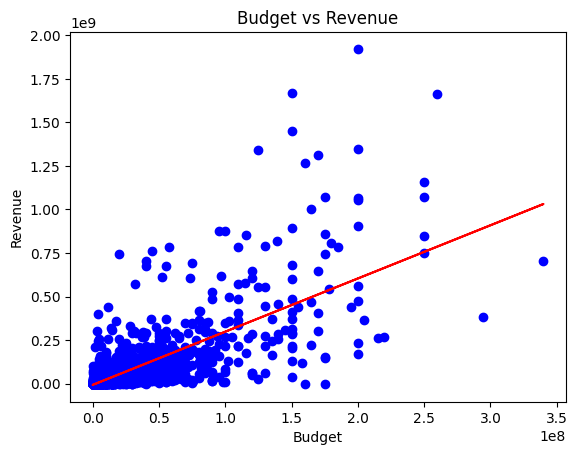

In [31]:
plt.scatter(X_test, y_test, color='blue')
plt.plot(X_test, y_pred, color='red')
plt.title('Budget vs Revenue')
plt.xlabel('Budget')
plt.ylabel('Revenue')
plt.show()


### 5.1 Plot the Results (Log Scale)

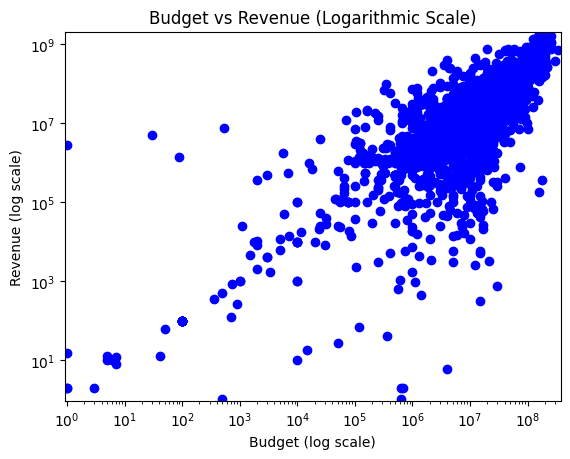

In [30]:
# Ensure X_test and y_test are numpy arrays and flatten them to 1D if necessary.
X_test_array = np.array(X_test).flatten()
y_test = np.array(y_test).flatten()

# Find the minimum positive values for Budget and Revenue
min_budget_positive = np.min(X_test_array[X_test_array > 0])
min_revenue_positive = np.min(y_test[y_test > 0])

# Find the maximum values for Budget and Revenue
max_budget = np.max(X_test_array)
max_revenue = np.max(y_test)

plt.scatter(X_test_array, y_test, color='blue')

plt.xscale('log')
plt.yscale('log')

# Set the buffer factor to be sensible, e.g., 1.1.
buffer_factor = 1.1
plt.xlim([min_budget_positive / buffer_factor, max_budget * buffer_factor])
plt.ylim([min_revenue_positive / buffer_factor, max_revenue * buffer_factor])

plt.title('Budget vs Revenue (Logarithmic Scale)')
plt.xlabel('Budget (log scale)')
plt.ylabel('Revenue (log scale)')

plt.show()

### 6. Some Results

In [7]:
# Print the coefficients
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)

# Calculate Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error:', mae)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

# Calculate R-squared (R2) score
r2 = r2_score(y_test, y_pred)
print('R-squared (R2) Score:', r2)

Coefficients: [3.05544331]
Intercept: -7389326.051370606
Mean Absolute Error: 52714871.48939339
Mean Squared Error: 1.3423859853907882e+16
R-squared (R2) Score: 0.5279307900027085
